# Software Analytics in Action
## An Interactive Hands-on Tutorial on Mining, Analyzing, Modelling, and Explaining Software Data
by Dr. Chakkrit (Kla) Tantithamthavorn, Monash University, Melbourne, Australia.

# About this tutorial
Software analytics focuses on analyzing and modeling a rich source of software data using well-established data analytics techniques in order to glean actionable insights for improving development practices, productivity, and software quality. However, if care is not taken when analyzing and modeling software data, the predictions and insights that are derived from analytical models may be inaccurate and unreliable. The goal of this hands-on tutorial is to guide participants on how to (1) analyze software data using statistical techniques like correlation analysis, hypothesis testing, effect size analysis, and multiple comparisons, (2) develop accurate, reliable, and reproducible analytical models, (3) interpret the models to uncover relationships and insights, and (4) discuss pitfalls associated with analytical techniques including hands-on examples with real software data. R will be the primary programming language. Code samples will be available in a public GitHub repository. Participants will do exercises via RStudio.

## Outline

* [Part I: Mining Software Data](#mining)
* [Part II: Analyzing Software Data](#analyzing)
* [Part III: Modelling Software Data](#modelling)
* [Part IV: Explaining Software Data](#explaining)

# Part I: Mining Software Data <a class="anchor" id="mining"></a>

This part is in progress. The content will be available soon.

# Part II: Analyzing Software Data <a class="anchor" id="mining"></a>

##### Let's suppress all warning

In [1]:
options(warn=-1)

##### Install necessary R packages for this tutorial

In [2]:
source("import.R")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: carData
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
lattice theme set by effectsTheme()
See ?effectsTheme for details.
Loading required package: reshape2
Loading required package: effsize
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked fro

##### Load an example defect dataset

In [3]:
eclipse <- loadDefectDataset("eclipse-2.0")
data <- eclipse$data
indep <- eclipse$indep
dep <- eclipse$dep
data[,dep] <- factor(data[,dep])

##### Understand your data

In [4]:
describe(data)

data 

 33  Variables      6729  Observations
--------------------------------------------------------------------------------
pre 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    6729        0       36    0.763    1.135    1.825        0        0 
     .25      .50      .75      .90      .95 
       0        0        1        3        5 

lowest :  0  1  2  3  4, highest: 34 36 40 49 69
--------------------------------------------------------------------------------
ACD 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    6729        0       20     0.39   0.4235   0.7742        0        0 
     .25      .50      .75      .90      .95 
       0        0        0        1        3 
                                                                            
Value          0     1     2     3     4     5     6     7     8     9    10
Frequency   5705   443   205   115    94    52    26    26    13    17     7
Proportion 0.848 0.066 0.

##### Understand the defective ratio

In [5]:
table(data[,dep])/nrow(data)


    FALSE      TRUE 
0.8551048 0.1448952 

# INTRO: PRELIMINARY DATA ANALYSIS

##### Check data distribution

In [6]:
summary(data$CC_sum)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     2.0    10.0    26.9    28.0  1299.0 

##### Hypothesis Testing (CC)

In [7]:
wilcox.test(data[data$post==TRUE,]$CC_sum, data[data$post==FALSE,]$CC_sum)


	Wilcoxon rank sum test with continuity correction

data:  data[data$post == TRUE, ]$CC_sum and data[data$post == FALSE, ]$CC_sum
W = 4380955, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


##### Let's take a look at the data distribution

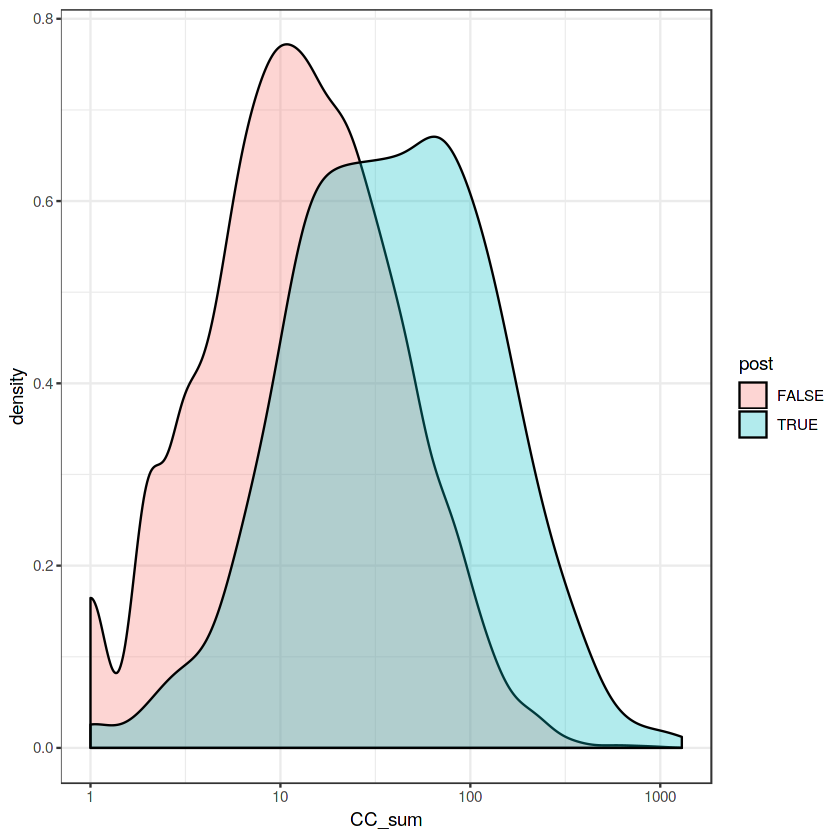

In [8]:
ggplot(data, aes(x=CC_sum, fill=post)) + geom_density(alpha=.3) + scale_x_log10() + theme_bw()

###### Test Alternative Hypotheses

In [9]:
wilcox.test(data[data$post==TRUE,]$CC_sum, data[data$post==FALSE,]$CC_sum, alternative = "greater")
wilcox.test(data[data$post==TRUE,]$CC_sum, data[data$post==FALSE,]$CC_sum, alternative = "less")


	Wilcoxon rank sum test with continuity correction

data:  data[data$post == TRUE, ]$CC_sum and data[data$post == FALSE, ]$CC_sum
W = 4380955, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  data[data$post == TRUE, ]$CC_sum and data[data$post == FALSE, ]$CC_sum
W = 4380955, p-value = 1
alternative hypothesis: true location shift is less than 0


##### Cliff's delta effect size

In [10]:
cliff.delta(data[data$post==TRUE,]$CC_sum, data[data$post==FALSE,]$CC_sum)


Cliff's Delta

delta estimate: 0.561796 (large)
95 percent confidence interval:
    lower     upper 
0.5304041 0.5916494 

##### Import 

In [11]:
source("import.R")

# Part III: Modelling Software Data <a class="anchor" id="modelling"></a>

## INTRO: BASIC REGRESSION ANALYSIS

##### Building a logistic regression model

In [12]:
m <- glm(post ~ CC_max, data = data, family="binomial")

##### Let's take a look how a model looks like

In [13]:
summary(m)


Call:
glm(formula = post ~ CC_max, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.6213  -0.5113  -0.4410  -0.3991   2.2671  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.490129   0.051777  -48.09   <2e-16 ***
CC_max       0.104319   0.004819   21.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5568.3  on 6728  degrees of freedom
Residual deviance: 4967.3  on 6727  degrees of freedom
AIC: 4971.3

Number of Fisher Scoring iterations: 5


##### What about the model visualization?

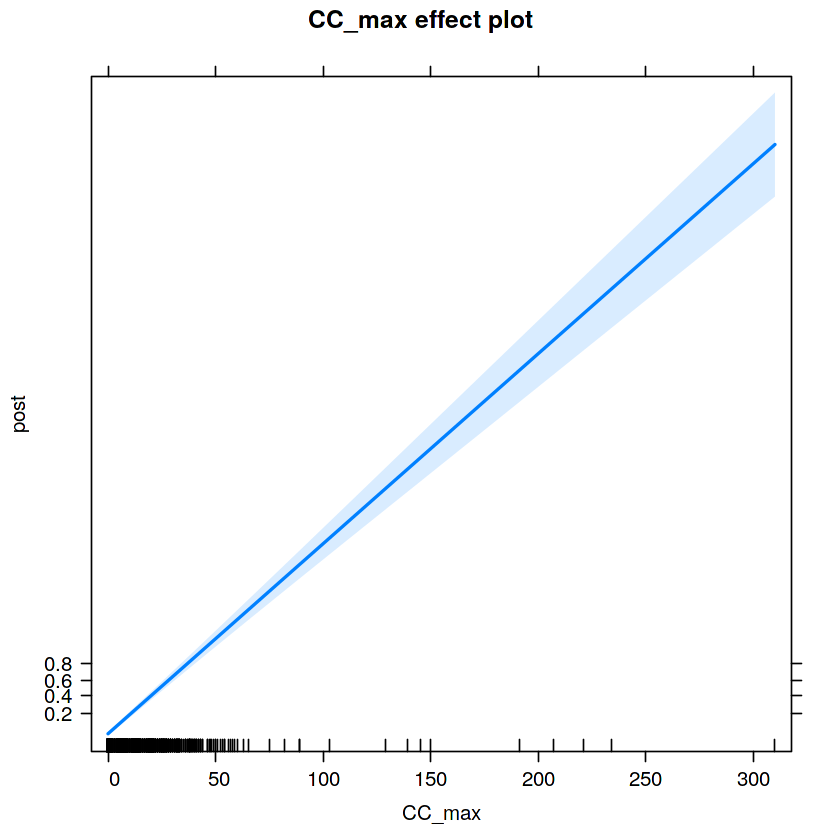

In [14]:
plot(allEffects(m))

## STEP1: INCLUDE CONTROL METRICS

In [15]:
m1 <- glm(post ~ CC_max + PAR_max + FOUT_max, data = data, family="binomial")
anova(m1)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,6728,5568.263
CC_max,1,600.97611,6727,4967.287
PAR_max,1,131.45283,6726,4835.835
FOUT_max,1,60.20786,6725,4775.627


In [16]:
m2 <- glm(post ~ TLOC + CC_max + PAR_max + FOUT_max, data = data, family="binomial")
anova(m2)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,6728,5568.263
TLOC,1,709.19340,6727,4859.070
CC_max,1,74.55689,6726,4784.513
PAR_max,1,63.35217,6725,4721.161
FOUT_max,1,17.40582,6724,4703.755


In [17]:
importance <- data.frame(m1=c(0,anova(m1)$Deviance[-1]), m2=anova(m2)$Deviance[-1])
importance <- data.frame(apply(importance, 2, function(x){x/sum(abs(x))}))
rownames(importance) <- c("TLOC","CC_max","PAR_max","FOUT_max")
round(importance,digit=2)*100

,m1,m2
,<dbl>,<dbl>
TLOC,0,82
CC_max,76,9
PAR_max,17,7
FOUT_max,8,2


## STEP2: REMOVE CORRELATED METRICS

### THE RISKS OF NOT REMOVING CORRELATED METRICS

In [18]:
m1 <- glm(post ~ CC_max + + CC_avg + PAR_max + FOUT_max, data = data, family="binomial")
anova(m1)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,6728,5568.263
CC_max,1,600.97611,6727,4967.287
CC_avg,1,18.67344,6726,4948.614
PAR_max,1,129.71197,6725,4818.902
FOUT_max,1,57.87581,6724,4761.026


In [19]:
m2 <- glm(post ~ CC_avg + CC_max + PAR_max + FOUT_max, data = data, family="binomial")
anova(m2)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,6728,5568.263
CC_avg,1,467.41722,6727,5100.846
CC_max,1,152.23233,6726,4948.614
PAR_max,1,129.71197,6725,4818.902
FOUT_max,1,57.87581,6724,4761.026


In [20]:
importance <- data.frame(m1=anova(m1)$Deviance[-1], m2=anova(m2)$Deviance[c(3,2,4,5)])
importance <- data.frame(apply(importance, 2, function(x){x/sum(abs(x))}))
rownames(importance) <- c("CC_max","CC_avg","PAR_max","FOUT_max")
round(importance,digit=2)*100

,m1,m2
,<dbl>,<dbl>
CC_max,74,19
CC_avg,2,58
PAR_max,16,16
FOUT_max,7,7


### SPEARMAN'S CORRELATION ANALYSIS

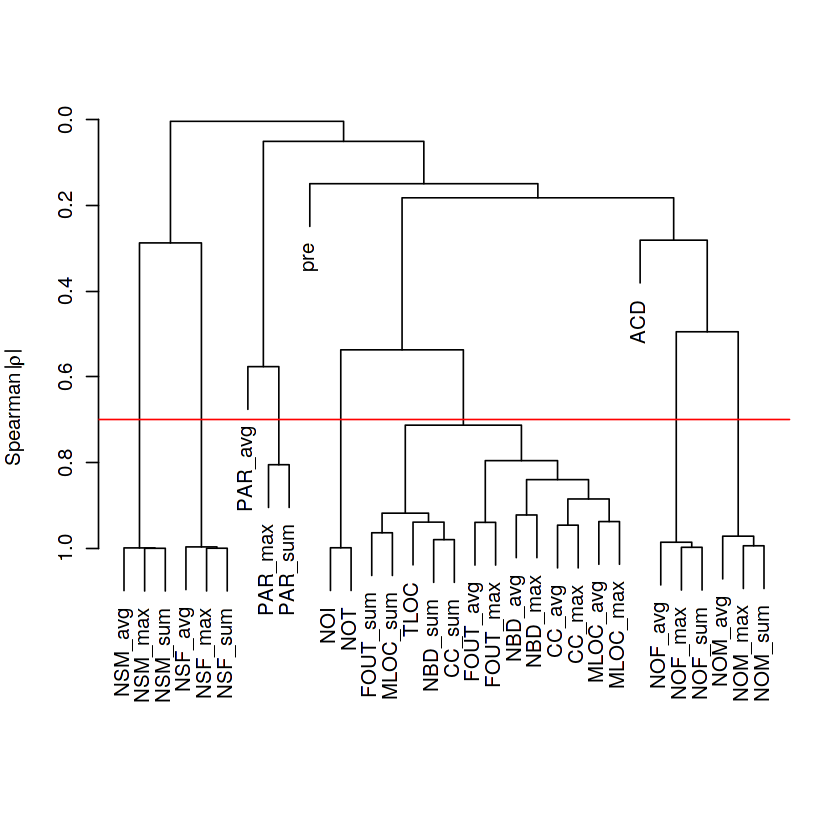

In [21]:
indep <- eclipse$indep
plot(varclus(as.matrix(data[,indep]), similarity="spear", trans="abs"))
abline(h=0.3, col="red")

### AutoSpearman: AUTOMATICALLY REMOVE CORRELATED METRICS

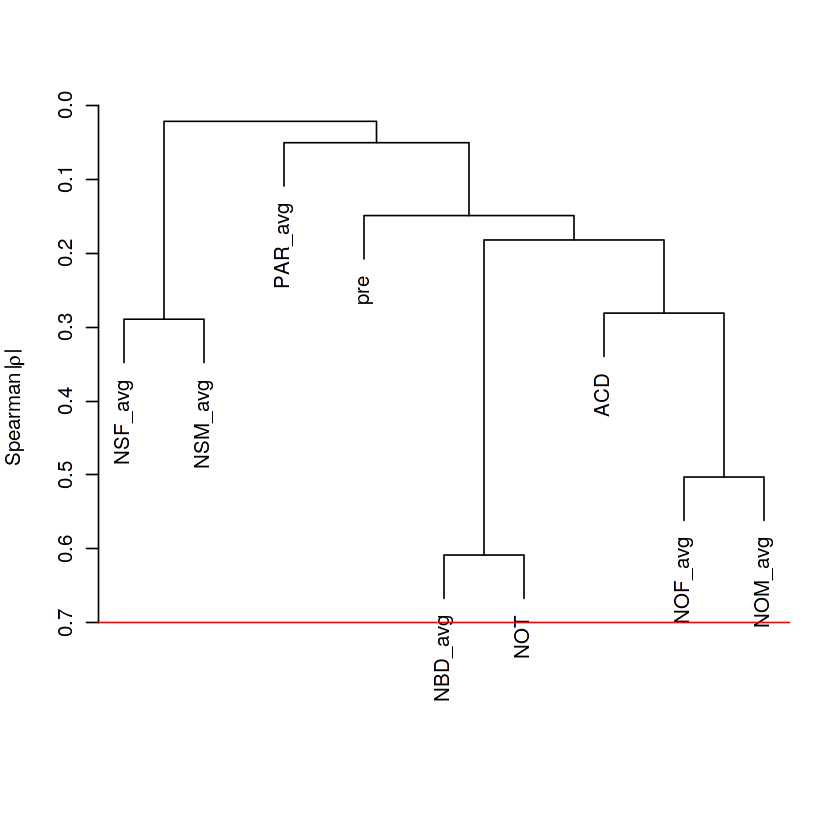

In [22]:
library(Rnalytica)
filterindep <- AutoSpearman(data, indep)
plot(varclus(as.matrix(data[, filterindep]), similarity="spear", trans="abs"))
abline(h=0.3, col="red")

## STEP3: BUILD EXPLAINABLE MODELS

In [23]:
indep <- AutoSpearman(data, eclipse$indep)

### A Decision Tree Model

In [24]:
tree.model <- C5.0(x = data[,indep], y = data[,dep])
summary(tree.model)


Call:
C5.0.default(x = data[, indep], y = data[, dep])


C5.0 [Release 2.07 GPL Edition]  	Sat May 25 18:27:46 2019
-------------------------------

Class specified by attribute `outcome'

Read 6729 cases (10 attributes) from undefined.data

Decision tree:

pre <= 1:
:...NOM_avg <= 17.5: FALSE (4924/342)
:   NOM_avg > 17.5:
:   :...NBD_avg > 1.971831:
:       :...ACD <= 2: TRUE (51/14)
:       :   ACD > 2: FALSE (5)
:       NBD_avg <= 1.971831:
:       :...NBD_avg <= 1.029412: FALSE (64/2)
:           NBD_avg > 1.029412:
:           :...NOM_avg <= 64: FALSE (332/77)
:               NOM_avg > 64: TRUE (21/7)
pre > 1:
:...pre > 6:
    :...pre > 12: TRUE (77/13)
    :   pre <= 12:
    :   :...NSM_avg > 0.25: TRUE (56/17)
    :       NSM_avg <= 0.25:
    :       :...NOF_avg <= 10.5: FALSE (94/39)
    :           NOF_avg > 10.5: TRUE (11/2)
    pre <= 6:
    :...NBD_avg <= 1.012195: FALSE (180/19)
        NBD_avg > 1.012195:
        :...NOM_avg > 23.5:
            :...ACD <= 0:
           

### Plot

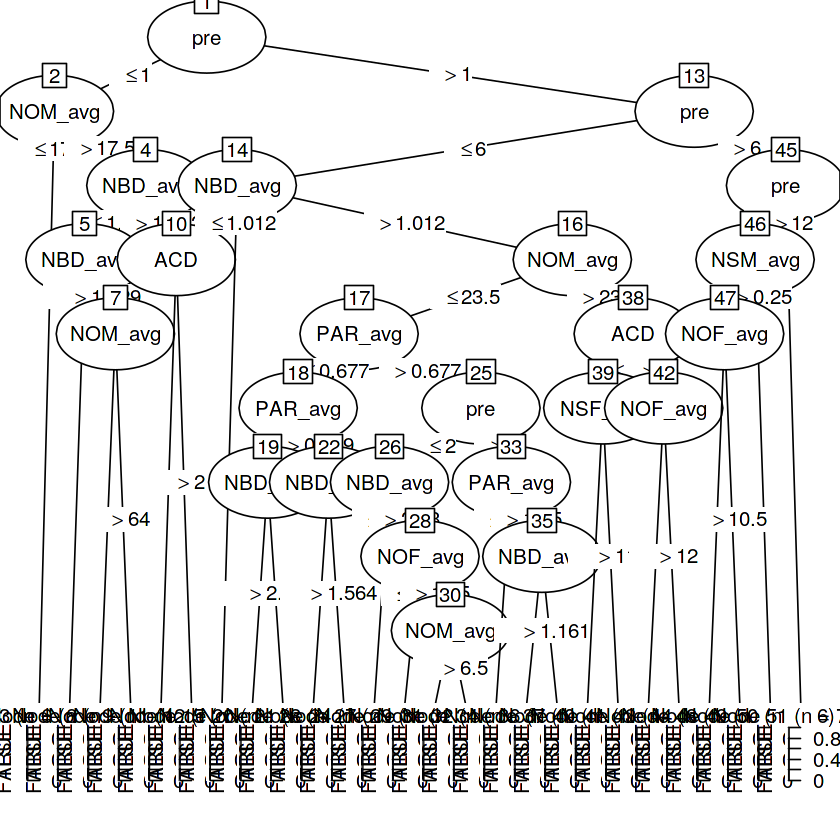

In [25]:
plot(tree.model)

### Build a Rule-Based Model

In [26]:
rule.model <- C5.0(x = data[, indep], y = data[,dep], rules = TRUE)

### Print a model summary

In [27]:
summary(rule.model)


Call:
C5.0.default(x = data[, indep], y = data[, dep], rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Sat May 25 18:27:48 2019
-------------------------------

Class specified by attribute `outcome'

Read 6729 cases (10 attributes) from undefined.data

Rules:

Rule 1: (2910/133, lift 1.1)
	pre <= 6
	NBD_avg <= 1.16129
	->  class FALSE  [0.954]

Rule 2: (3680/217, lift 1.1)
	pre <= 2
	NOM_avg <= 6.5
	->  class FALSE  [0.941]

Rule 3: (4676/316, lift 1.1)
	pre <= 1
	NBD_avg <= 1.971831
	NOM_avg <= 64
	->  class FALSE  [0.932]

Rule 4: (4924/342, lift 1.1)
	pre <= 1
	NOM_avg <= 17.5
	->  class FALSE  [0.930]

Rule 5: (5423/547, lift 1.1)
	pre <= 6
	NOM_avg <= 23.5
	PAR_avg <= 1.75
	->  class FALSE  [0.899]

Rule 6: (5189/552, lift 1.0)
	pre <= 12
	NOF_avg <= 10.5
	NSM_avg <= 0.25
	->  class FALSE  [0.893]

Rule 7: (77/13, lift 5.7)
	pre > 12
	->  class TRUE  [0.823]

Rule 8: (54/11, lift 5.4)
	NBD_avg > 1.029412
	NOM_avg > 64
	->  class TRUE  [0.786]

Rule 9: (11/2, lift 5.3)
	pre > 6

### Build a Random Forest model

In [28]:
f <- as.formula(paste( "post", '~', paste(indep, collapse = "+")))
rf.model <- randomForest(f, data = data, importance = TRUE, keep.forest=TRUE)

### Print a Random Forest model

In [29]:
print(rf.model)


Call:
 randomForest(formula = f, data = data, importance = TRUE, keep.forest = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 12.38%
Confusion matrix:
      FALSE TRUE class.error
FALSE  5565  189  0.03284672
TRUE    644  331  0.66051282


### Print a variable importance plot

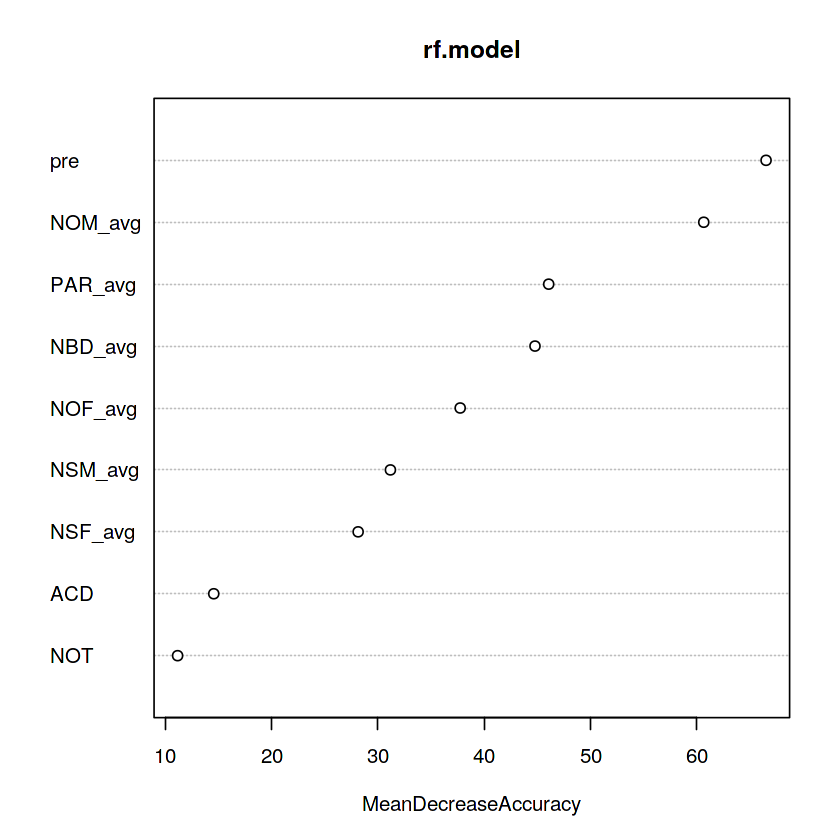

In [30]:
varImpPlot(rf.model, type="1")

### FAST-AND-FRUGAL TREE MODEL

In [31]:
f <- as.formula(paste( "post", '~', paste(indep, collapse = "+")))
fft.model <- FFTrees(formula = f, data = data)
print(fft.model)

post is now logical.


FFT 1 (of 7) predicts post using 3 cues: {pre, NBD_avg, NOM_avg}

[1] If pre <= 0, decide False.
[2] If NBD_avg > 1.3, decide True.
[3] If NOM_avg <= 7.4, decide False, otherwise, decide True.

                     train test
cases       .n    6729.000   --
hits        .hi    636.000   --
misses      .mi    339.000   --
false al    .fa   1368.000   --
corr rej    .cr   4386.000   --
speed       .mcu     1.532   --
frugality   .pci     0.847   --
cost        .cost    0.254   --
accuracy    .acc     0.746   --
balanced    .bacc    0.707   --
sensitivity .sens    0.652   --
specificity .spec    0.762   --

pars: algorithm = 'ifan', goal = 'wacc', goal.chase = 'wacc', sens.w = 0.5, max.levels = 4

### Visualize a FAST-AND-FRUGAL TREE MODEL

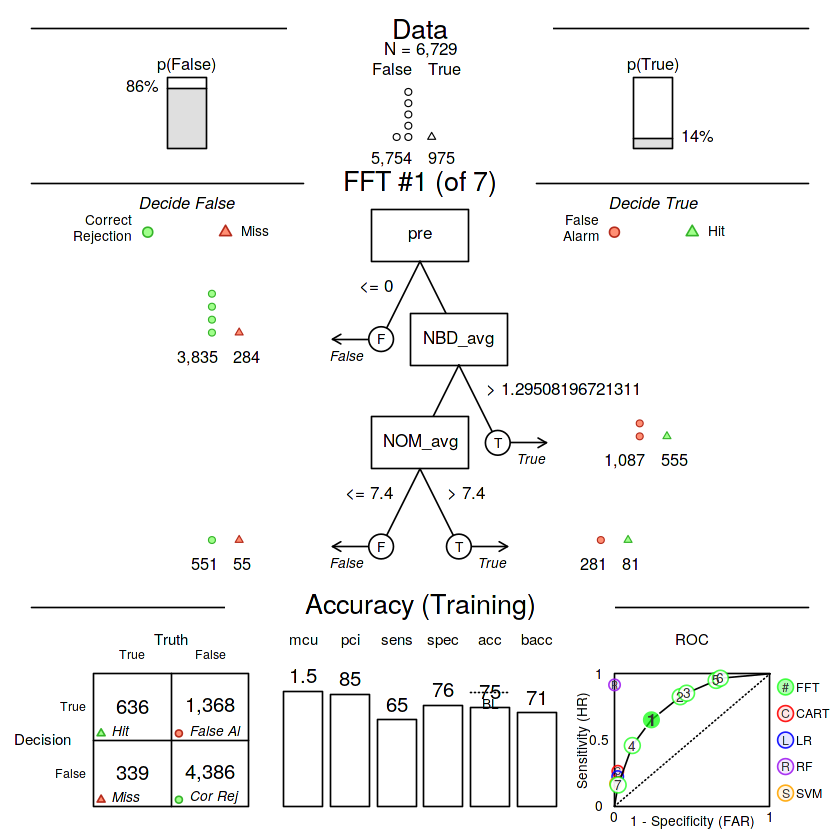

In [32]:
plot(fft.model)

## STEP4: Explore different parameter settings

In [33]:
# results <- list()
# for(i in seq(1,10)){
#   set.seed(i)
#   indices <- sample(nrow(data), replace=TRUE)
#   training <- data[indices,]
#   testing <- data[-indices,]
#   indep <- AutoSpearman(training, eclipse$indep)
#   f <- as.formula(paste( "post", '~', paste(indep, collapse = "+")))
#   
#   glm.model <- glm(f, data = training, family="binomial")
#   defaulttree.model <- C5.0(x = training[, indep], y = training[,dep], rules=TRUE, trials=1)
#   optimaltree.model <- C5.0(x = training[, indep], y = training[,dep], rules=TRUE, trials=100)
#   rf10trees.model <- randomForest(f, data = training, importance = TRUE, ntree=10)
#   rf100trees.model <- randomForest(f, data = training, importance = TRUE, ntree=100)
# 
#   predictions <- data.frame(
#     GLM = predict(glm.model, testing, type="response"),
#     C50.1trial = predict(defaulttree.model, testing, type="prob")[,"TRUE"],
#     C50.100trials = predict(optimaltree.model, testing, type="prob")[,"TRUE"],
#     RF.10trees = predict(rf10trees.model, testing, type="prob")[,"TRUE"],
#     RF.100trees = predict(rf100trees.model, testing, type="prob")[,"TRUE"]
#   )
#   performance <- apply(predictions, 2, function(x) performance.calculation(testing[,dep], x))
#   results[["AUC"]] <- rbind(results[["AUC"]], performance["AUC",])
#   results[["Fmeasure(0.5)"]] <- rbind(results[["Fmeasure(0.5)"]], performance["Fmeasure",])
#   
#   performance <- apply(predictions, 2, function(x) performance.calculation(testing[,dep], x, threshold = 0.2))
#   results[["Fmeasure(0.2)"]] <- rbind(results[["Fmeasure(0.2)"]], performance["Fmeasure",])
#   
#   performance <- apply(predictions, 2, function(x) performance.calculation(testing[,dep], x, threshold = 0.8))
#   results[["Fmeasure(0.8)"]] <- rbind(results[["Fmeasure(0.8)"]], performance["Fmeasure",])
# }
# saveRDS(results, "figures/parameter-settings.rds")

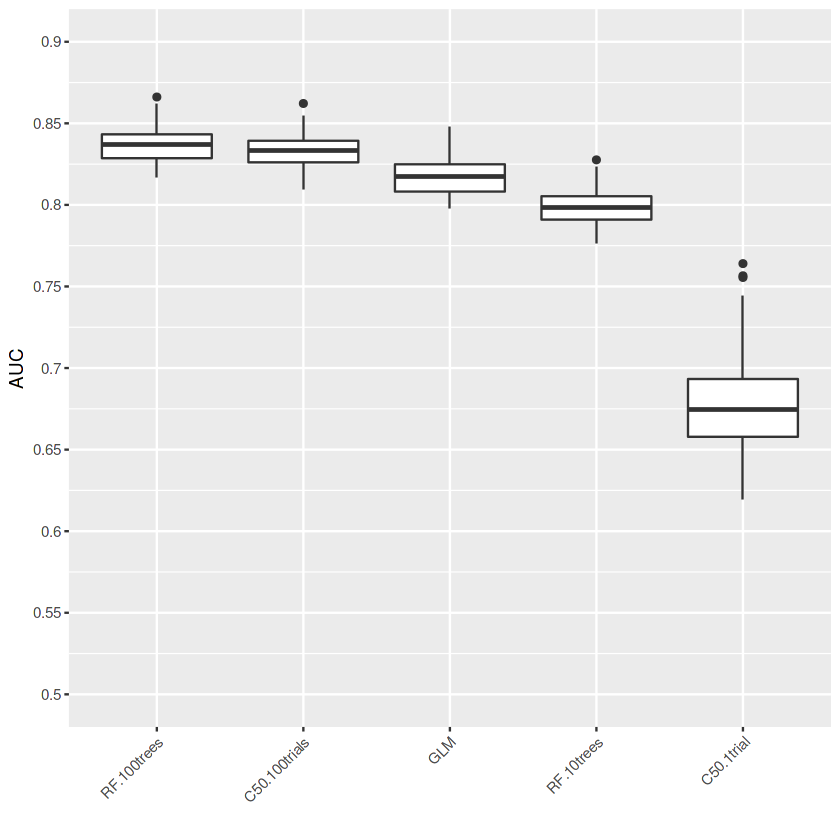

In [34]:
results <- readRDS("figures/parameter-settings.rds")
ggplot(melt(results[["AUC"]]), aes(x=reorder(Var2, -value, median), y=value)) + geom_boxplot()  + ylab("AUC") + xlab("") + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + scale_y_continuous(breaks = 10:18*0.05, labels = 10:18*0.05, limit=c(0.5,0.9))

## STEP5: USE OUT-OF-SAMPLE BOOTSTRAP

Using method as id variables


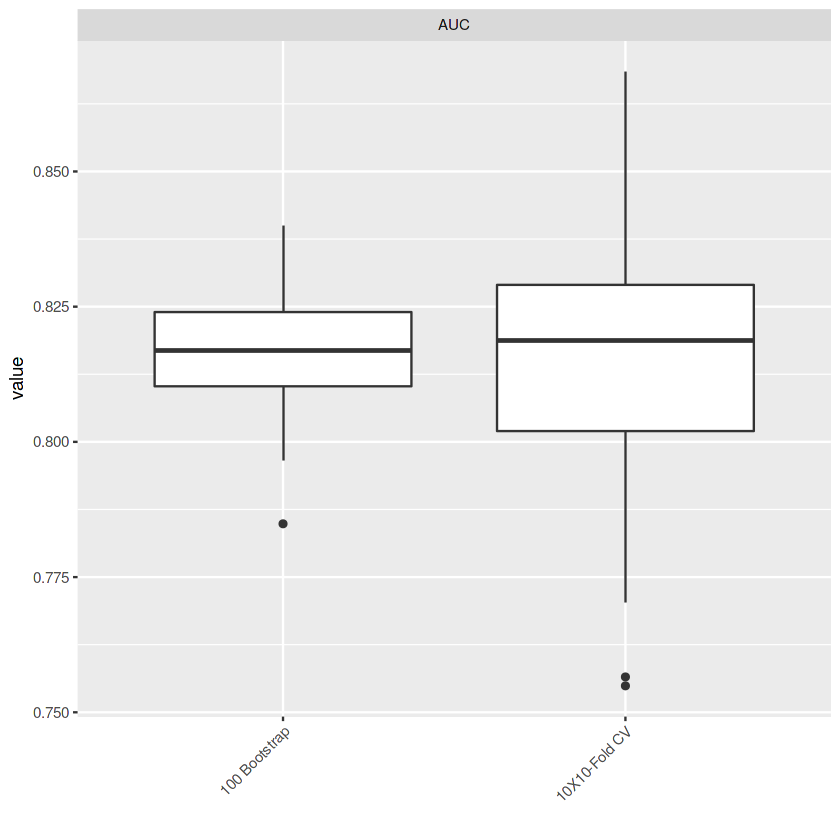

In [35]:
results <- NULL
indep <- AutoSpearman(data, eclipse$indep)
f <- as.formula(paste( "post", '~', paste(indep, collapse = "+")))

for(i in seq(1,100)){
  set.seed(1234+i)
  indices <- sample(nrow(data), replace=TRUE)
  training <- data[indices,]
  testing <- data[-indices,]
  
  m <- glm(f, data = training, family="binomial")
  predictions <- predict(m, testing, type="response")
  performance <- performance.calculation(testing[,dep], predictions)
  results <- rbind(results, c(method="100 Bootstrap",performance["AUC"]))
}

# 10x10-folds CV
for(i in seq(1,10)){
  set.seed(1234+i)
  indices <- createFolds(data[, dep], k = 10, list = TRUE, returnTrain = TRUE)
  for(i in seq(1,10)){
    training <- data[indices[[i]],]
    testing <- data[-indices[[i]],]
    
    m <- glm(f, data = training, family="binomial")
    predictions <- predict(m, testing, type="response")
    performance <- performance.calculation(testing[,dep], predictions)
    results <- rbind(results, c(method="10X10-Fold CV",performance["AUC"]))
  }
}

results <- data.frame(results)
results$AUC <- as.numeric(as.character(results$AUC))

ggplot(melt(results), aes(x=method, y=value)) + geom_boxplot() + ylab("value") + xlab("") + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + facet_wrap(~variable, scales="free_y") 

## STEP6: SUMMARIZE BY A ScottKnott-ESD TEST 

No id variables; using all as measure variables


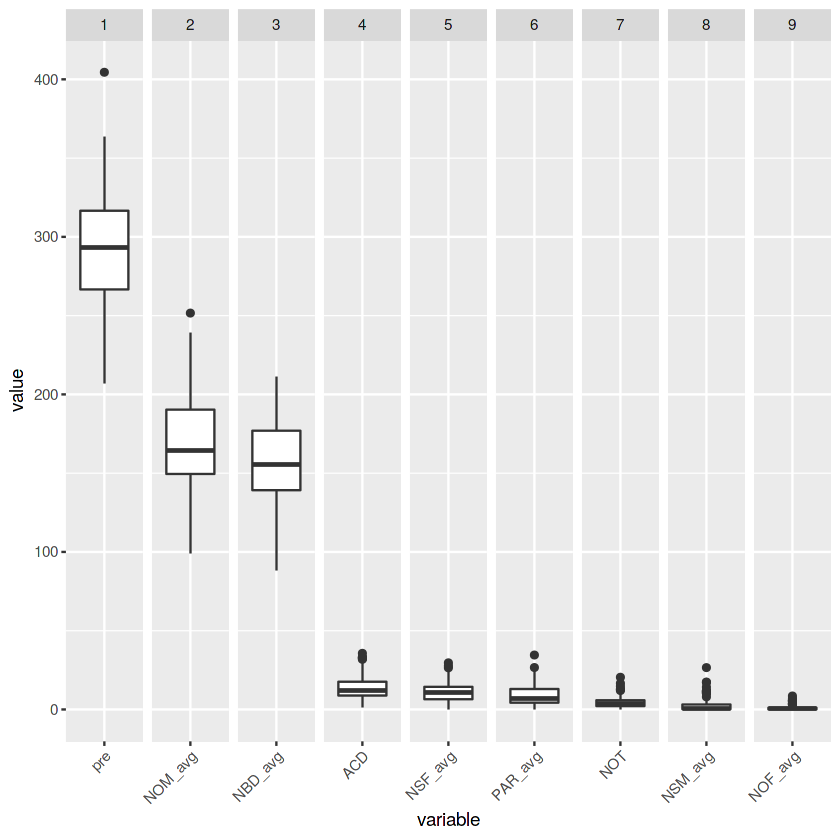

In [36]:
importance <- NULL
indep <- AutoSpearman(data, eclipse$indep)
f <- as.formula(paste( "post", '~', paste(indep, collapse = "+")))
for(i in seq(1,100)){
  indices <- sample(nrow(data), replace=TRUE)
  training <- data[indices,]
  m <- glm(f, data = training, family="binomial")
  importance <- rbind(importance, Anova(m,type="2",test="LR")$"LR Chisq")
}

importance <- data.frame(importance)
colnames(importance) <- indep

df <- melt(importance)
df$rank <- sk_esd(importance)$groups[as.character(df$variable)]

ggplot(df, aes(x=variable, y=value)) + geom_boxplot() + facet_grid(~rank, scales = "free", drop = TRUE) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

## STEP7: VISUALIZE THE RELATIONSHIPS

In [37]:
indep <- AutoSpearman(data, eclipse$indep)
f <- as.formula(paste( "post", '~', paste(indep, collapse = "+")))
m <- glm(f, data = data, family="binomial")

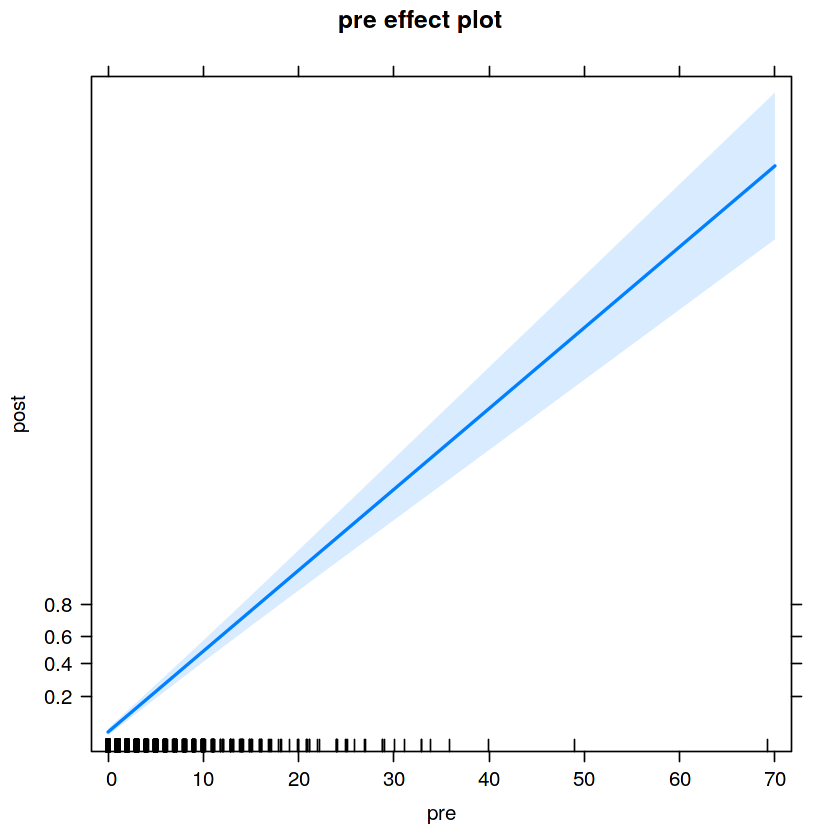

In [38]:
plot(effect("pre",m))

## DON'T USE ANOVA TYPE-I

In [39]:
indep1 <- c("TLOC","NSF_max","NSM_max","NOF_max")
f <- as.formula(paste0(dep, " ~ ", paste0(indep1,collapse = "+")))
m <- glm(f, data=data, family="binomial")
anova(m)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,6728,5568.263
TLOC,1,709.1933977,6727,4859.070
NSF_max,1,0.5941960,6726,4858.476
NSM_max,1,0.1685477,6725,4858.307
NOF_max,1,33.2212919,6724,4825.086


In [40]:
Anova(m)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
TLOC,630.30444430,1,4.291484e-139
NSF_max,0.09637628,1,7.562224e-01
NSM_max,0.09127543,1,7.625619e-01
NOF_max,33.22129193,1,8.224503e-09


## The risks of reordering model specification

In [41]:

indep1 <- c("NSF_max","NSM_max","NOF_max","ACD")
f <- as.formula(paste0(dep, " ~ ", paste0(indep1,collapse = "+")))
m <- glm(f, data=data, family="binomial")

importance1 <- data.frame(Type1.1=anova(m)$Deviance[-1], Type2.1=Anova(m,type="2",test="LR")$"LR Chisq")
rownames(importance1) <- indep1

indep2 <- c("NSM_max","ACD","NSF_max","NOF_max")
f <- as.formula(paste0(dep, " ~ ", paste0(indep2,collapse = "+")))
m <- glm(f, data=data, family="binomial")
importance2 <- data.frame(Type1.2=anova(m)$Deviance[-1], Type2.2=Anova(m,type="2",test="LR")$"LR Chisq")
rownames(importance2) <- indep2

importance <- data.frame(importance1[indep1,],importance2[indep1,])
importance <- data.frame(apply(importance, 2, function(x){x/sum(abs(x))}))

round(importance[order(-importance$Type2.1),], digit=2)*100

,Type1.1,Type2.1,Type1.2,Type2.2
,<dbl>,<dbl>,<dbl>,<dbl>
ACD,28,47,49,47
NOF_max,32,23,13,23
NSM_max,11,19,31,19
NSF_max,29,11,7,11


## DON’T CHANGE PROBABILITY THRESHOLD

No id variables; using all as measure variables
No id variables; using all as measure variables
No id variables; using all as measure variables


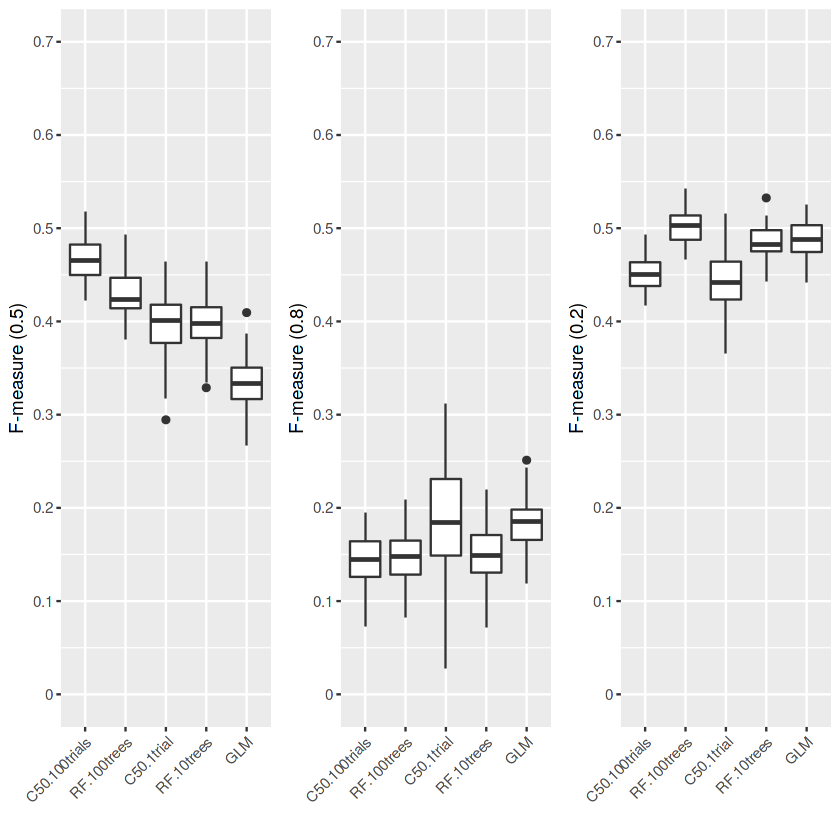

In [42]:
results <- readRDS("figures/parameter-settings.rds")
levels <- c("C50.100trials","RF.100trees","C50.1trial","RF.10trees","GLM")
g1<- ggplot(melt(data.frame(results[["Fmeasure(0.5)"]])), aes(x=factor(variable, levels=levels), y=value)) + geom_boxplot()  + ylab("F-measure (0.5)") + xlab("") + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + scale_y_continuous(labels=0:7*0.1, breaks=0:7*0.1, limit=c(0, 0.7))

g2<- ggplot(melt(data.frame(results[["Fmeasure(0.8)"]]),na.rm=TRUE), aes(x=factor(variable, levels=levels), y=value)) + geom_boxplot() + ylab("F-measure (0.8)") + xlab("") + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + scale_y_continuous(labels=0:7*0.1, breaks=0:7*0.1, limit=c(0, 0.7))

g3<- ggplot(melt(data.frame(results[["Fmeasure(0.2)"]]),na.rm=TRUE), aes(x=factor(variable, levels=levels), y=value)) + geom_boxplot()  + ylab("F-measure (0.2)") + xlab("") + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + scale_y_continuous(labels=0:7*0.1, breaks=0:7*0.1, limit=c(0, 0.7))

grid.arrange(g1,g2,g3,ncol=3)

## DON’T REBALANCE THE DATA

No id variables; using all as measure variables
No id variables; using all as measure variables


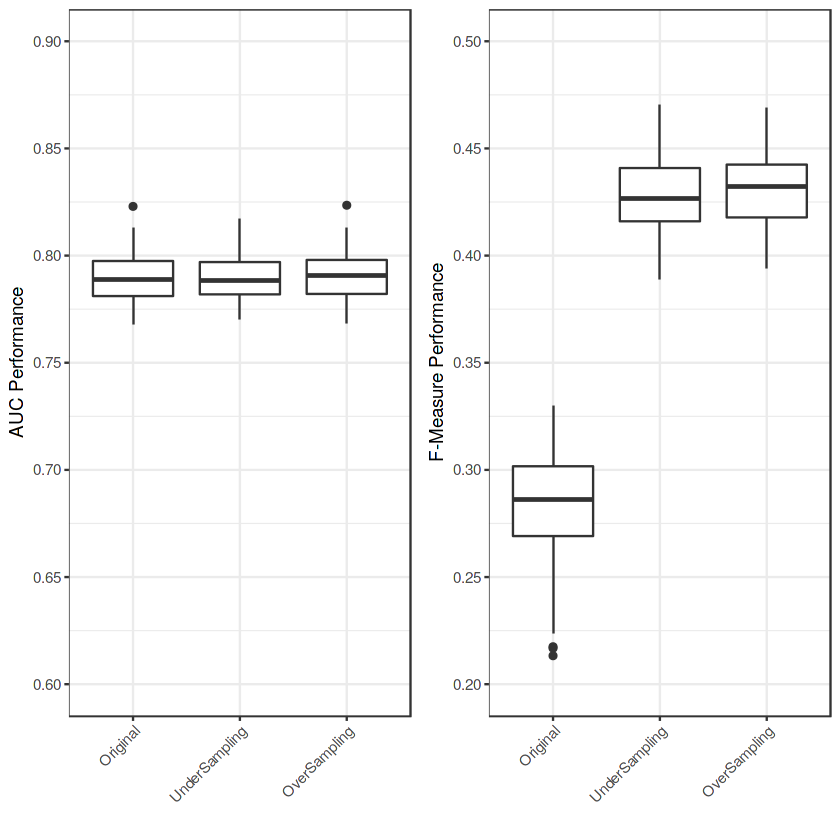

In [43]:

indep <- c("TLOC","PAR_max",'NOI',"NOF_max","FOUT_max","NSM_max","NSF_max","ACD","NOM_max")

original.m <- fit(data, dep, indep, classifier="lr", rebalance="no", validation="boot")
down.m <- fit(data, dep, indep, classifier="lr", rebalance="down", validation="boot")
up.m <- fit(data, dep, indep, classifier="lr", rebalance="up", validation="boot")

auc <- data.frame(Original=original.m$performance$AUC, 
                  UnderSampling=down.m$performance$AUC,
                  OverSampling=up.m$performance$AUC)
g1 <- ggplot(melt(auc), aes(x=variable, y=value)) + geom_boxplot() + theme_bw() + ylab("AUC Performance") + xlab("") + scale_y_continuous(breaks=12:20*0.05, limits = c(0.6,0.9)) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

fmeasure <- data.frame(Original=original.m$performance$Fmeasure, 
                       UnderSampling=down.m$performance$Fmeasure,
                       OverSampling=up.m$performance$Fmeasure)
g2 <- ggplot(melt(fmeasure), aes(x=variable, y=value)) + geom_boxplot() + theme_bw() + ylab("F-Measure Performance") + xlab("") + scale_y_continuous(breaks=4:10*0.05, limits = c(0.2,0.5)) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

grid.arrange(g1,g2, ncol=2)

# Part IV: Explaining Software Data <a class="anchor" id="explaining"></a>

This part is in progress and the content will be available soon.